<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [9]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('./data/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [10]:
# BeautifulSoup cleaner function
def clean(docs):
    cleaned = []
    for doc in docs:
        soup = BeautifulSoup(doc, 'html.parser')
        soup = soup.get_text()
        cleaned.append(soup)
    return cleaned

In [11]:
df['clean_description'] = clean(df['description'])
df

,Unnamed: 0,description,title,clean_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an..."
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ..."
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a..."
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB..."


## 2) Use Spacy to tokenize the listings 

In [12]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(df['clean_description'][0])

In [13]:
# Get lemma for each token that isn't stop word or punctuation
print([token.lemma_ for token in doc if (token.is_stop == False) and
                                        (token.is_punct == False)])

['b"Job', 'requirements:\\nconceptual', 'understanding', 'Machine', 'Learning', 'model', 'like', 'nai\\xc2\\xa8ve', 'Bayes', 'K', 'Means', 'SVM', 'Apriori', 'Linear/', 'Logistic', 'Regression', 'neural', 'Random', 'Forests', 'decision', 'Trees', 'K', 'NN', 'hand', 'experience', '2', 'them\\nintermediate', 'expert', 'level', 'coding', 'skill', 'Python', 'R.', 'ability', 'write', 'function', 'clean', 'efficient', 'datum', 'manipulation', 'mandatory', 'role)\\nexposure', 'package', 'like', 'NumPy', 'SciPy', 'Pandas', 'Matplotlib', 'etc', 'Python', 'GGPlot2', 'dplyr', 'tidyR', 'R\\nAbility', 'communicate', 'Model', 'finding', 'Technical', 'Non', 'technical', 'stake', 'holders\\nhand', 'experience', 'SQL', 'Hive', 'similar', 'programming', 'language\\nmust', 'past', 'work', 'GitHub', 'Kaggle', 'publish', 'article\\nmaster', 'degree', 'Statistics', 'Mathematics', 'Computer', 'Science', 'quant', 'specific', 'field.\\napply']


In [15]:
def get_tokens(listings):
    """ Takes a pandas column and returns an array of tokens """
    tokens_list = []
    for listing in listings:
        listing = nlp(listing)
        one_listing = []
        for token in listing:
            if ((token.is_stop == False) and (token.is_punct == False)):
                one_listing.append(token.lemma_)
        tokens_list.append(one_listing)
        
    return tokens_list
        
# Using function to create a tokens list column
df['tokens'] = get_tokens(df['clean_description'])
df

,Unnamed: 0,description,title,clean_description,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, requirements:\nconceptual, understandi..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'Job, description\n\na, Data, scientist, 1, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, Data, scientist, work, consult, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location, USA, \xe2\x80\x93, multiple, loca..."
...,...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an...","[b""About, Us:\nWant, fantastic, fun, startup, ..."
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ...","[b'InternshipAt, Uber, ignite, opportunity, se..."
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a...","[b'$200,000, $, 350,000, yearA, million, peopl..."
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...","[b""SENIOR, DATA, SCIENTIST\nJOB, description\n..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=1000)

In [17]:
# build vocab
vect.fit(df['clean_description'])

# transform text
dtm = vect.transform(df['clean_description'])

In [18]:
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [19]:
totals = dtm.aggregate(['sum'])
totals

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
sum,52,35,39,43,28,41,318,122,37,71,...,28,49,28,33,114,1417,75,73,443,34


In [20]:
# Top words
totals.sort_values(by='sum', ascending=False, axis=1)

,data,xe2,x80,experience,business,work,team,science,learning,analytics,...,extraction,peers,nlead,specifically,video,helps,request,uncover,drug,personalization
sum,4394,1417,1404,1238,1198,976,972,956,912,730,...,26,26,26,26,26,26,26,26,26,26


## 4) Visualize the most common word counts

In [21]:
top_words = totals.sort_values(by='sum', ascending=False, axis=1)
words = list(top_words.columns)[:15]
counts = list(top_words.iloc[0].values[:15])

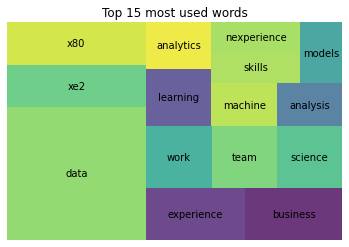

In [22]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=counts, label=words, alpha=.8)
plt.axis('off')
plt.title("Top 15 most used words")
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = vectorizer.fit_transform(df['clean_description'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=vectorizer.get_feature_names())
dtm

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043033,0.0,0.0,0.0,0.038609,0.0,0.0,0.0,0.0,0.0
422,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
423,0.118271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
424,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018824,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [26]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [32]:

ideal_job = ["""
    Data scientist working with autonomous vehicles and using computer vision to solve problems.
    Pays a million dollars a year plus company car.
"""]

obj = vectorizer.transform(ideal_job)
obj

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [33]:
nn.kneighbors(obj.todense())


(array([[1.30246092, 1.32058339, 1.32058339, 1.34249081, 1.34754504]]),
 array([[316, 423,  44, 186, 325]]))

In [34]:
# Most similar
df['clean_description'][316]

'b"Nauto is an AI technology company that\'s improving the safety of commercial fleets today and the autonomous fleets of tomorrow. Nauto\'s intelligent driver safety system assesses how drivers interact with the vehicle and the road ahead to reduce distracted driving and prevent collisions. With this knowledge, Nauto is powering the development of self-driving technology that brings the best of human driving to autonomy. Are you ready to help with this mission?\\n\\nWe\'re aiming for greater safety and knowledge: Our approach to re-thinking road safety is two-fold: deepen our understanding of real-world drivers to learn how they interact with the vehicle and road, with the goal of reducing distracted driving and preventing collisions before they occur. Second, apply these insights to the development of safe, effective autonomous vehicles that fit into existing traffic patterns and human driving behavior.\\n\\nWe\'re taking a driver-centric approach: We surface the safety insights that

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 